In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.8 MB/s eta 0:00:00


Implementasi Program Fuzzy

Kinerja Mahasiswa: 78.53


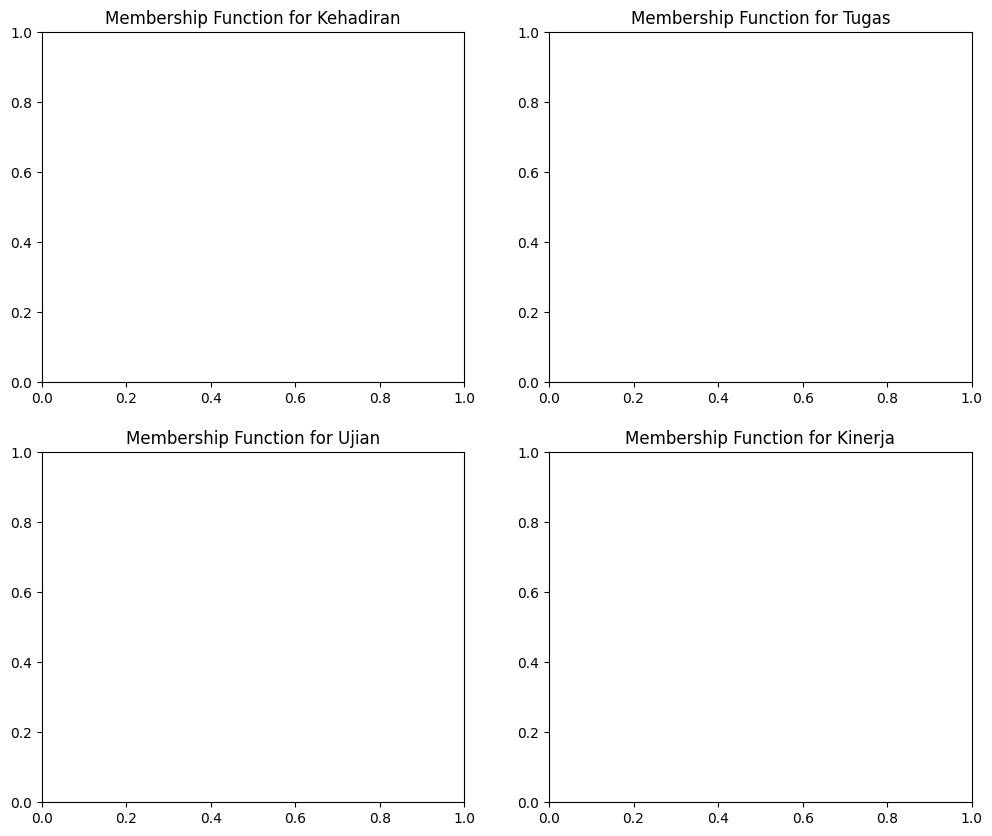

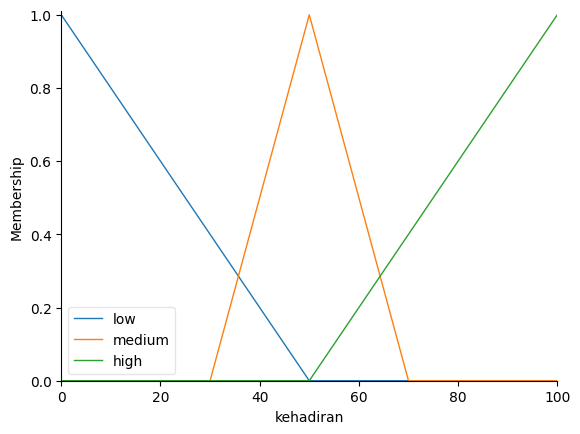

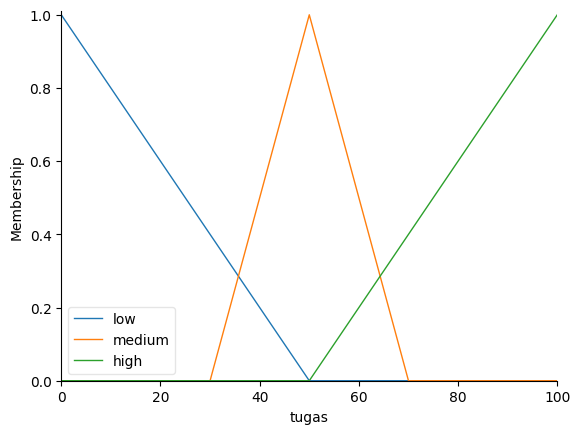

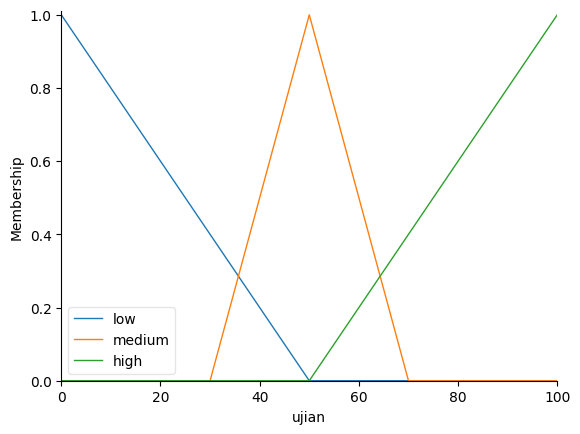

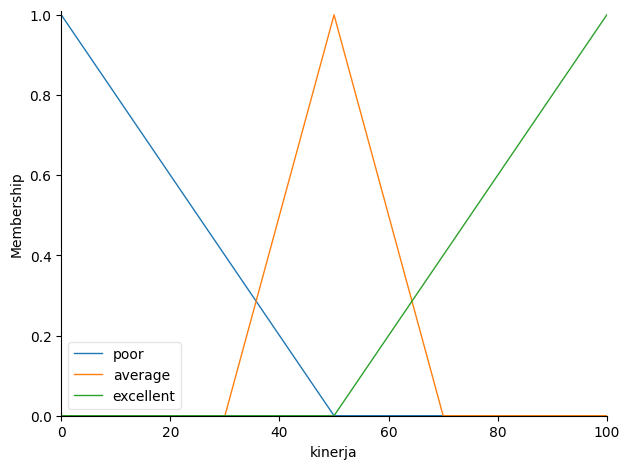

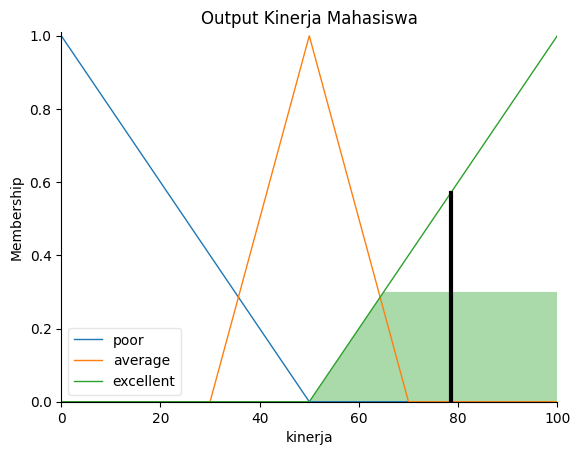

In [2]:
# Install library
!pip install scikit-fuzzy

# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
kehadiran = ctrl.Antecedent(np.arange(0, 101, 1), 'kehadiran')
tugas = ctrl.Antecedent(np.arange(0, 101, 1), 'tugas')
ujian = ctrl.Antecedent(np.arange(0, 101, 1), 'ujian')
kinerja = ctrl.Consequent(np.arange(0, 101, 1), 'kinerja')

# Membership functions for kehadiran
kehadiran['low'] = fuzz.trimf(kehadiran.universe, [0, 0, 50])
kehadiran['medium'] = fuzz.trimf(kehadiran.universe, [30, 50, 70])
kehadiran['high'] = fuzz.trimf(kehadiran.universe, [50, 100, 100])

# Membership functions for tugas
tugas['low'] = fuzz.trimf(tugas.universe, [0, 0, 50])
tugas['medium'] = fuzz.trimf(tugas.universe, [30, 50, 70])
tugas['high'] = fuzz.trimf(tugas.universe, [50, 100, 100])

# Membership functions for ujian
ujian['low'] = fuzz.trimf(ujian.universe, [0, 0, 50])
ujian['medium'] = fuzz.trimf(ujian.universe, [30, 50, 70])
ujian['high'] = fuzz.trimf(ujian.universe, [50, 100, 100])

# Membership functions for kinerja
kinerja['poor'] = fuzz.trimf(kinerja.universe, [0, 0, 50])
kinerja['average'] = fuzz.trimf(kinerja.universe, [30, 50, 70])
kinerja['excellent'] = fuzz.trimf(kinerja.universe, [50, 100, 100])

# Define rules
rule1 = ctrl.Rule(kehadiran['low'] | tugas['low'] | ujian['low'], kinerja['poor'])
rule2 = ctrl.Rule(kehadiran['medium'] & tugas['medium'] & ujian['medium'], kinerja['average'])
rule3 = ctrl.Rule(kehadiran['high'] & tugas['high'] & ujian['high'], kinerja['excellent'])

# Control system
kinerja_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kinerja_simulation = ctrl.ControlSystemSimulation(kinerja_ctrl)

# Input values
kinerja_simulation.input['kehadiran'] = 70
kinerja_simulation.input['tugas'] = 65
kinerja_simulation.input['ujian'] = 80

# Compute
kinerja_simulation.compute()

# Output result
output_kinerja = kinerja_simulation.output['kinerja']
print(f"Kinerja Mahasiswa: {output_kinerja:.2f}")

# Visualize membership functions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

kehadiran.view(ax=axes[0, 0])
axes[0, 0].set_title('Membership Function for Kehadiran')

tugas.view(ax=axes[0, 1])
axes[0, 1].set_title('Membership Function for Tugas')

ujian.view(ax=axes[1, 0])
axes[1, 0].set_title('Membership Function for Ujian')

kinerja.view(ax=axes[1, 1])
axes[1, 1].set_title('Membership Function for Kinerja')

plt.tight_layout()
plt.show()

# Visualize the result
kinerja.view(sim=kinerja_simulation)
plt.title("Output Kinerja Mahasiswa")
plt.show()